In [3]:
import pandas as pd
import sys, os

sys.path.append("../")
from utils.loggers import Logger01
from strategies.TaLib_SMACross import TaLib_SMACross
from datetime import datetime
from utils.basic import get_report_complete

sys.path.append("../libraries/backtrader")
import backtrader as bt

sys.path.append('../libraries/quantstats')
import quantstats as qs

In [4]:
# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(TaLib_SMACross)

datapath='../data/us/daily/aapl.csv'
df = pd.read_csv(datapath)
df['date'] = pd.to_datetime(df['date'])
# Create a Data Feed
data = bt.feeds.PandasData(dataname=df,datetime=0,open=1,high=2,low=3,close=4,volume=5)

df = pd.read_csv(datapath)
df["date"] = pd.to_datetime(df["date"])
# Create a Data Feed
data = bt.feeds.PandasData(
    dataname=df, datetime=0, open=1, high=2, low=3, close=4, volume=5
)

# Add the Data Feed to Cerebro
cerebro.adddata(data)
cerebro.resampledata(data, name=datapath.replace("/", "-").replace("\\", "-"))

log_path = f'../backtests/test_TaLib_SMACross_{datapath.replace("/","-").replace(chr(92),"-")}_{datetime.now().isoformat()}'

cerebro.addanalyzer(Logger01, log_path=log_path, data_df=df)

# Set our desired cash start
cerebro.broker.setcash(1000)
cerebro.broker.setcommission(commission=0.001, margin=None)

if not os.path.exists(log_path):
    os.makedirs(log_path)
writer_path = os.path.join(log_path, "writer.csv")
cerebro.addwriter(bt.WriterFile, csv=True, out=writer_path)

# Print out the starting conditions
print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

# Run over everything
cerebro.run(exactbars=1)

# Print out the final result
print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())


Starting Portfolio Value: 1000.00
[LOG] - Funds logged
[LOG] - Orders logged
[LOG] - Trades logged


/home/fcelaya/quant/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


No analysis
Final Portfolio Value: 1085.17


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-01-04  2010-01-04
End Period                 2022-06-29  2022-06-29
Risk-Free Rate             0.0%        0.0%
Time in Market             64.0%       100.0%

Cumulative Return          8.52%       1,721.62%
CAGR﹪                     0.66%       26.16%

Sharpe                     0.49        0.96
Prob. Sharpe Ratio         95.7%       99.96%
Smart Sharpe               0.49        0.96
Sortino                    0.7         1.41
Smart Sortino              0.69        1.4
Sortino/√2                 0.49        0.99
Smart Sortino/√2           0.49        0.99
Omega                      1.16        1.16

Max Drawdown               -3.51%      -44.38%
Longest DD Days            721         720
Volatility (ann.)          1.36%       28.42%
R^2                        0.3         0.3
Information Ratio          -0.06       -0.06
Calmar                     0.19     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-09-02,2021-05-12,2021-12-08,462,-3.511894,-3.237943
2,2022-01-04,2022-04-27,2022-06-29,176,-3.335393,-3.110327
3,2020-02-13,2020-02-28,2020-05-20,97,-1.273260,-1.269476
4,2019-05-06,2019-08-05,2019-10-11,158,-0.950186,-0.839395
5,2018-01-19,2018-06-25,2018-08-29,222,-0.910190,-0.861616


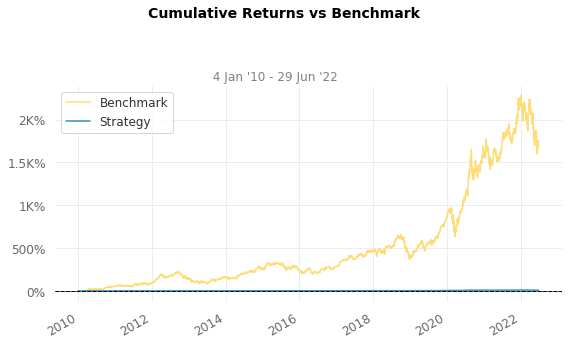

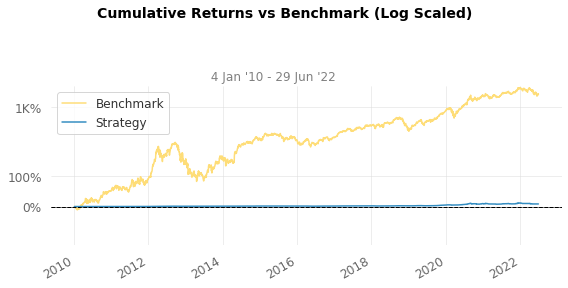

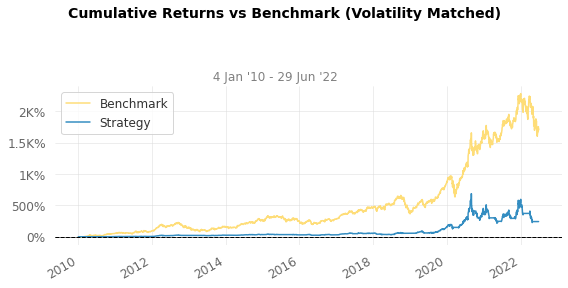

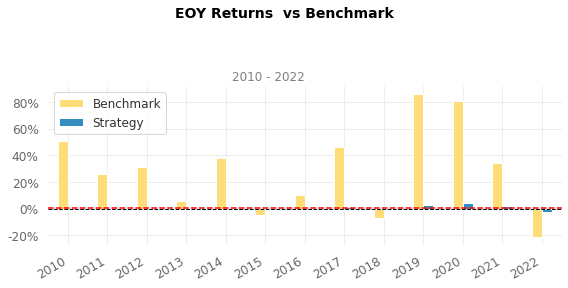

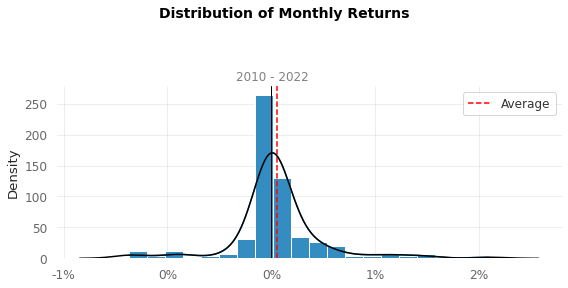

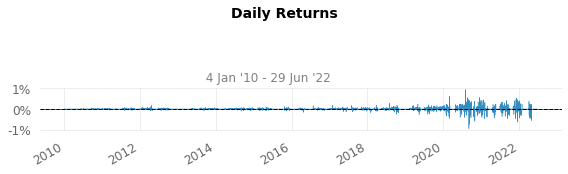

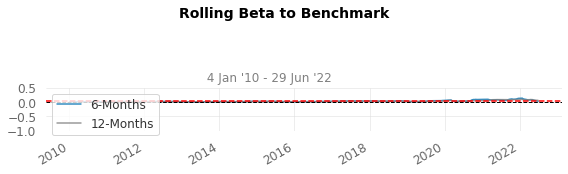

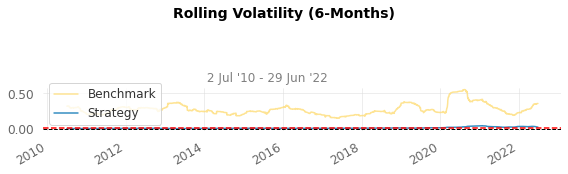

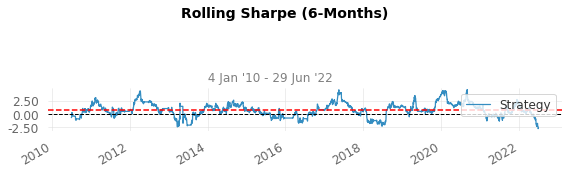

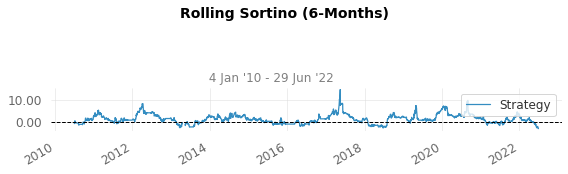

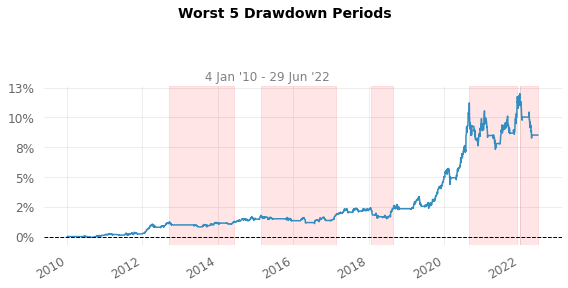

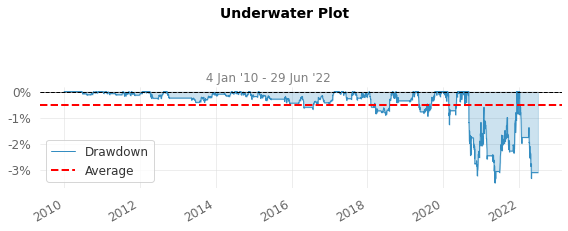

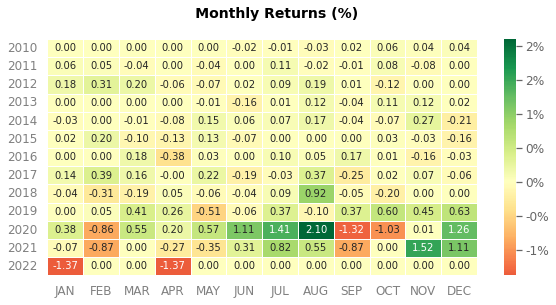

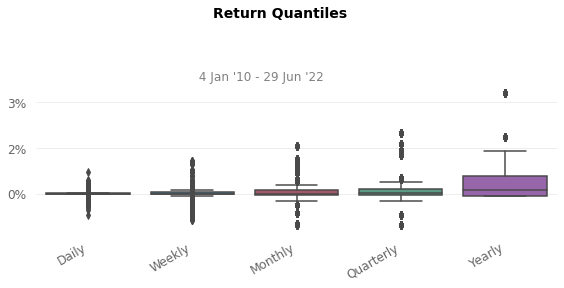

In [5]:
get_report_complete(log_path=log_path, html=True,console=True)